In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from sklearn import preprocessing #Used for Normalized calculations
import seaborn as sb


In [2]:
# Create path references for our 2 input CSV files - 1)city_data and 2)ride_data
city_data_path = "../raw_data/city_data.csv"
ride_data_path = "../raw_data/ride_data.csv"

In [3]:
# Import the city_data CSV files to its respective dataframe
city_df = pd.read_csv(city_data_path, low_memory = False)
# Print the first five rows of data to the screen - just to be sure we have imported the CSV correctly
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
# Import the ride_data CSV files to its respective dataframe
ride_df = pd.read_csv(ride_data_path, low_memory = False)
# Print the first five rows of data to the screen - just to be sure we have imported the CSV correctly
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
# Merge city and ride data dataframes into one combined dataframe
pyber_df = pd.merge(city_df, ride_df, on = "city", how = "outer")
pyber_df.head() # print the first 5 rows

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [6]:
# Export our dataframe as one CSV, without the Pandas index, but with the header
pyber_df.to_csv("../raw_data/pyber_tushaar.csv", index=False, header=True)

In [7]:
# Performing some basic calculations to check the sanity of our data - like checking lengths of differnt columns
print (pyber_df.dtypes)
print (len (city_df["city"]))
print (len (ride_df["city"]))
print (len (pyber_df["city"]))
print (len (ride_df["city"].unique()))
print (len (city_df["city"].unique()))
print (len (pyber_df["city"].unique()))

# These are all optional calculations for me to check the lengths

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object
126
2375
2407
125
125
125


In [8]:
# Creating 3 New DataFrames based on the City Types - Urban, Suburban and Rural
pyber_urban_df = pyber_df.loc[pyber_df["type"] == "Urban"]
pyber_suburban_df = pyber_df.loc[pyber_df["type"] == "Suburban"]
pyber_rural_df = pyber_df.loc[pyber_df["type"] == "Rural"]
# The above code used 'loc' function to create 3 different dataframes each split by Urban, Suburban and Rural city types

In [9]:
# Core Calculations Module - This is my core calculations engine to perform most of the calculations needed for this assignment

# Calculations for Average Fare, Total Fare and Total Rides per each city type - Urban, Suburban and Rural

# Looking at the Urban Dataframe first

pyber_urban_city_df = pyber_urban_df.groupby(["city"]) # Creating a group by city view first for urban cities
average_fare_per_urban_city = pyber_urban_city_df["fare"].mean() # Calculating average fare
total_fare_per_urban_city = pyber_urban_city_df["fare"].sum() # Calculating total fare
total_rides_per_urban_city = pyber_urban_city_df["ride_id"].count() # Calculating total rides

total_fare_urban = total_fare_per_urban_city.sum() # Calculating total fare of all urban cities
total_rides_urban = total_rides_per_urban_city.sum() # Calculating total rides of all urban cities

#--------------------------------------------------------------------------------------

# Dropping duplicates for pyber_suburban df for Port James City
pyber_suburban_df_rem_dup = pyber_suburban_df.drop_duplicates(subset = ["ride_id"], keep = "first")
# Note, in the suburban cities (starting with our original City Dataframe), "Port James" is repeated twice = once with 15 and second with 3 for Driver Counts.

pyber_suburban_city_df = pyber_suburban_df_rem_dup.groupby(["city"]) # Creating a group by city view first for cities

average_fare_per_suburban_city = pyber_suburban_city_df["fare"].mean()# Calculating average fare
total_fare_per_suburban_city = pyber_suburban_city_df["fare"].sum()# Calculating total fare
total_rides_per_suburban_city = pyber_suburban_city_df["ride_id"].count() # Calculating total rides

total_fare_suburban = total_fare_per_suburban_city.sum()# Calculating total fare of all suburban cities

total_rides_suburban = len(pyber_suburban_city_df["ride_id"].value_counts())# Calculating total rides of all urban cities
total_rides_suburban_1 = total_rides_per_suburban_city.sum() #Used the sum to doublecheck my results which I achieved via length

#total_rides_suburban_1 and total_rides_suburban will give the exact same results

#--------------------------------------------------------------------------------------

pyber_rural_city_df = pyber_rural_df.groupby(["city"]) # Creating a group by city view first for cities
average_fare_per_rural_city = pyber_rural_city_df["fare"].mean()# Calculating average fare
total_fare_per_rural_city = pyber_rural_city_df["fare"].sum()# Calculating total fare
total_rides_per_rural_city = pyber_rural_city_df["ride_id"].count()# Calculating total rides

total_fare_rural = total_fare_per_rural_city.sum()# Calculating total fare for all rural cities
total_rides_rural = total_rides_per_rural_city.sum()# Calculating total rides of all rural cities

#--------------------------------------------------------------------------------------


# Calculating Total Fare and Total Rides - This data will be used for plotting percentages in the future

total_fare  = round((total_fare_urban + total_fare_suburban + total_fare_rural),2)
total_rides = total_rides_urban + total_rides_suburban + total_rides_rural

#--------------------------------------------------------------------------------------

# Calculations for Percentage of Total Fares per each city type - Urban, Suburban and Rural, rounded off to 1

urban_fare_percentage = round(((total_fare_urban/total_fare)*100),1)
suburban_fare_percentage = round(((total_fare_suburban/total_fare)*100),1)
rural_fare_percentage = round(((total_fare_rural/total_fare)*100),1)


#--------------------------------------------------------------------------------------

# Calculations for Percentage of Total Rides per each city type - Urban, Suburban and Rural

urban_ride_percentage = round(((total_rides_urban/total_rides)*100),1)
suburban_ride_percentage = round(((total_rides_suburban/total_rides)*100),1)
rural_ride_percentage = round(((total_rides_rural/total_rides)*100),1)

In [10]:
# Calculations for Total Number of Drivers Per City
# Getting rid of duplicates
pyber_urban_df_unique = pyber_urban_df.drop_duplicates(subset=["city","driver_count"], keep='first')
pyber_suburban_df_unique = pyber_suburban_df.drop_duplicates(subset=["city","driver_count"], keep='first')
pyber_rural_df_unique = pyber_rural_df.drop_duplicates(subset=["city","driver_count"], keep='first')

# Now counting total number of drivers each for urban, suburban and rural cities
urban_drivers = pyber_urban_df_unique.groupby("city")["driver_count"].sum()
suburban_drivers = pyber_suburban_df_unique.groupby("city")["driver_count"].sum()
rural_drivers = pyber_rural_df_unique.groupby("city")["driver_count"].sum()

#--------------------------------------------------------------------------------------

In [11]:
# Driver Count Calculations - Per City Type - Urban, Suburban and Rural
# Creating 3 New DataFrames based on the City Types - Urban, Suburban and Rural on the original city dataframe

city_urban_df = city_df.loc[city_df["type"] == "Urban"]
city_suburban_df = city_df.loc[city_df["type"] == "Suburban"]
city_rural_df = city_df.loc[city_df["type"] == "Rural"]

# Now counting total number of drivers each for urban, suburban and rural cities
total_drivers_urban = city_urban_df["driver_count"].sum()
total_drivers_suburban = city_suburban_df["driver_count"].sum()
total_drivers_rural = city_rural_df["driver_count"].sum()

#Total Drivers
total_drivers = city_df["driver_count"].sum()

#--------------------------------------------------------------------------------------

# Calculations for Percentage of Total Drivers per each city type - Urban, Suburban and Rural

urban_drivers_percentage = round(((total_drivers_urban/total_drivers)* 100),1)
suburban_drivers_percentage = round(((total_drivers_suburban/total_drivers)* 100),1)
rural_drivers_percentage = round(((total_drivers_rural/total_drivers)* 100),1)

#--------------------------------------------------------------------------------------

In [12]:
print ("Total Urban Drivers are: " + str(total_drivers_urban))
print ("Total Suburban Drivers are: " + str(total_drivers_suburban))
print ("Total Rural Drivers are: " + str(total_drivers_rural))
print ("Total Pyber Drivers are:" + str(total_drivers_urban + total_drivers_suburban + total_drivers_rural))

Total Urban Drivers are: 2607
Total Suburban Drivers are: 638
Total Rural Drivers are: 104
Total Pyber Drivers are:3349


In [13]:
# Now creating 3 dataframes - Urban, Suburban and Rural - these dataframes will be used for plotting our bubblecharts

urban_city_calcs_df = pd.DataFrame({"Average Fare ($) Per City": average_fare_per_urban_city,
                                    "Total Number of Rides Per City": total_rides_per_urban_city,
                                    "Total Number of Drivers Per City": urban_drivers
                                   },
                                   columns = ["Average Fare ($) Per City", "Total Number of Rides Per City", "Total Number of Drivers Per City"]
                                  )

suburban_city_calcs_df = pd.DataFrame({"Average Fare ($) Per City": average_fare_per_suburban_city,
                                    "Total Number of Rides Per City": total_rides_per_suburban_city,
                                    "Total Number of Drivers Per City": suburban_drivers
                                   },
                                   columns = ["Average Fare ($) Per City", "Total Number of Rides Per City", "Total Number of Drivers Per City"]
                                  )

rural_city_calcs_df = pd.DataFrame({"Average Fare ($) Per City": average_fare_per_rural_city,
                                    "Total Number of Rides Per City": total_rides_per_rural_city,
                                    "Total Number of Drivers Per City": rural_drivers
                                   },
                                   columns = ["Average Fare ($) Per City", "Total Number of Rides Per City", "Total Number of Drivers Per City"]
                                  )

In [14]:
# Adding the City Type coloumn for each dataframe. This is needed for bubblechart.

urban_city_calcs_df ["City Type (Urban, Suburban, Rural)"] = "Urban"
suburban_city_calcs_df ["City Type (Urban, Suburban, Rural)"] = "Suburban"
rural_city_calcs_df ["City Type (Urban, Suburban, Rural)"] = "Rural"


In [15]:
# Now creating a master aggregated dataframe - which will be used for our bubble plots

total_city_calcs_df = urban_city_calcs_df
total_city_calcs_df = total_city_calcs_df.append(suburban_city_calcs_df) 
total_city_calcs_df = total_city_calcs_df.append(rural_city_calcs_df) 
total_city_calcs_df.head()
bubble_chart_df = total_city_calcs_df

In [16]:
# Data Preview for all Bubble Graphs and Plots....

In [17]:
total_city_calcs_df.head()

,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,"City Type (Urban, Suburban, Rural)"
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban
Arnoldview,25.106452,31,41,Urban


In [18]:
urban_city_calcs_df.head()

,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,"City Type (Urban, Suburban, Rural)"
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban
Arnoldview,25.106452,31,41,Urban


In [19]:
suburban_city_calcs_df.head() 

,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,"City Type (Urban, Suburban, Rural)"
city,,,,
Anitamouth,37.315556,9,16,Suburban
Campbellport,33.711333,15,26,Suburban
Carrollbury,36.606000,10,4,Suburban
Clarkstad,31.051667,12,21,Suburban
Conwaymouth,34.591818,11,18,Suburban


In [20]:
rural_city_calcs_df.head()

,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,"City Type (Urban, Suburban, Rural)"
city,,,,
East Leslie,33.660909,11,9,Rural
East Stephen,39.053000,10,6,Rural
East Troybury,33.244286,7,3,Rural
Erikport,30.043750,8,3,Rural
Hernandezshire,32.002222,9,10,Rural


In [21]:
bubble_chart_df.head()

,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,"City Type (Urban, Suburban, Rural)"
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban
Arnoldview,25.106452,31,41,Urban


In [22]:
print (len(urban_city_calcs_df))
print (len(suburban_city_calcs_df))
print (len(rural_city_calcs_df))
print (len(total_city_calcs_df))
print (len(bubble_chart_df))

66
41
18
125
125


In [23]:
# Export our dataframe as one CSV, without the Pandas index, but with the header
bubble_chart_df.to_csv("../raw_data/bubble_plot_tushaar.csv", index=False, header=True)

In [24]:
# Data Preview for all the Pie Charts....

In [25]:
print ("Raw Data for Total Fares by City Type")
print ("Total Urban Fare Percentage: " + str(urban_fare_percentage))
print ("Total Suburban Fare Percentage: " +str(suburban_fare_percentage))
print ("Total Rural Fare Percentage: "+ str(rural_fare_percentage))

print ("\nRaw Data for Total Rides by City Type")
print ("Total Urban Ride Percentage: "+ str(urban_ride_percentage))
print ("Total Suburban Ride Percentage: "+ str(suburban_ride_percentage))
print ("Total Rural Ride Percentage: "+ str(rural_ride_percentage))


print ("\nRaw Data for Total Drivers by City Type")
print ("Total Urban Drivers Percentage: "+ str(urban_drivers_percentage))
print ("Total Suburban Drivers Percentage: "+ str(suburban_drivers_percentage))
print ("Total Rural Drivers Percentage: "+ str(rural_drivers_percentage))


Raw Data for Total Fares by City Type
Total Urban Fare Percentage: 63.0
Total Suburban Fare Percentage: 30.3
Total Rural Fare Percentage: 6.7

Raw Data for Total Rides by City Type
Total Urban Ride Percentage: 68.4
Total Suburban Ride Percentage: 26.3
Total Rural Ride Percentage: 5.3

Raw Data for Total Drivers by City Type
Total Urban Drivers Percentage: 77.8
Total Suburban Drivers Percentage: 19.1
Total Rural Drivers Percentage: 3.1


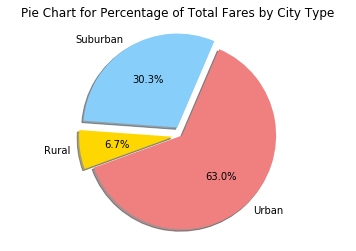

In [26]:
# Code for pie chart for Percentage of Total Fares by City Type

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_fare_percentage, suburban_fare_percentage, rural_fare_percentage]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the Suburban and Rural sections from the others
explode = (0, 0.1, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Create Title
plt.title("Pie Chart for Percentage of Total Fares by City Type")



# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()


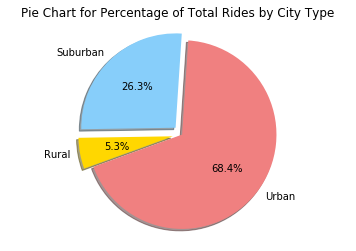

In [27]:
# Code for pie chart for Percentage of Total Rides by City Type

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_ride_percentage, suburban_ride_percentage, rural_ride_percentage]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the Suburban and Rural sections from the others
explode = (0, 0.1, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Create Title
plt.title("Pie Chart for Percentage of Total Rides by City Type")



# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()

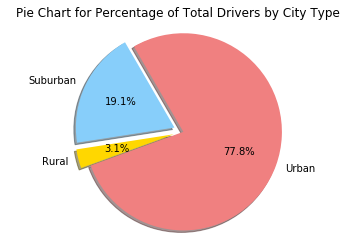

In [28]:
# Code for pie chart for Percentage of Total Drivers by City Type

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_drivers_percentage, suburban_drivers_percentage, rural_drivers_percentage]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the Suburban and Rural sections from the others
explode = (0, 0.1, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Create Title
plt.title("Pie Chart for Percentage of Total Drivers by City Type")



# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()

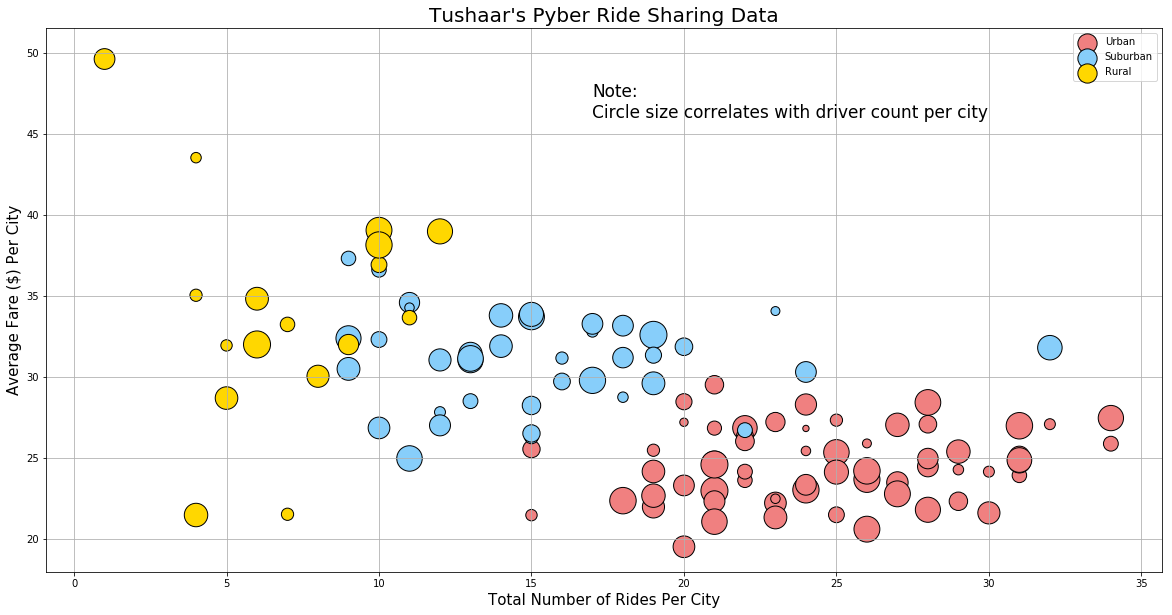

In [29]:
# Code for the bubble plot

# First create the main plot where we start with the urban city dataframe
main_plot = urban_city_calcs_df.plot(kind='scatter', x= 'Total Number of Rides Per City', 
                         y= "Average Fare ($) Per City", color = "lightcoral",edgecolors="black", 
                         grid=True,  figsize=(20,10), s=total_city_calcs_df["Total Number of Drivers Per City"]*10,  
                         legend = True, label = "Urban"
                        )

# Now we append suburban city dataframe to the main plot - via qualifier 'ax = main_plot'
suburban_city_calcs_df.plot(kind='scatter', x= 'Total Number of Rides Per City', 
                         y= "Average Fare ($) Per City", color = "lightskyblue",edgecolors="black", 
                         grid=True, figsize=(20,10),  s=total_city_calcs_df["Total Number of Drivers Per City"]*10,  
                         legend = True, label = "Suburban", ax = main_plot
                        )

# Now we again append rural city dataframe to the main plot - again via qualifier 'ax = main_plot'
rural_city_calcs_df.plot(kind='scatter', x= 'Total Number of Rides Per City', 
                         y= "Average Fare ($) Per City", color = "gold",edgecolors="black", 
                         grid=True, figsize=(20,10),  s=total_city_calcs_df["Total Number of Drivers Per City"]*10,  
                         legend = True, label = "Rural", ax = main_plot,
                        )

# Printing the labels and titles with their respective font sizes
plt.xlabel('Total Number of Rides Per City', fontsize = 15)
plt.ylabel("Average Fare ($) Per City", fontsize = 15)
plt.title("Tushaar's Pyber Ride Sharing Data", fontsize = 20)

# Printing annotation text with its respective font size
plt.annotate(s='Note:\nCircle size correlates with driver count per city',xy= (0,30), xytext=(17,46), fontsize = 17)

# Show the plot
plt.show()

In [30]:
# Code from this point onwards is no longer needed
# ------------------------------------------------------------------------------------------------------------------

In [31]:
pyber_city_df = pyber_df.groupby(["city"])
average_fare_per_city = pyber_city_df["fare"].mean()
total_rides_per_city = pyber_city_df["ride_id"].count()
total_drivers_per_city = pyber_city_df["driver_count"].unique()
city_type = pyber_city_df["type"].unique()

In [32]:
pyber_city_calcs_df = pd.DataFrame({"Average Fare ($) Per City": average_fare_per_city,
                                    "Total Number of Rides Per City": total_rides_per_city,
                                    "Total Number of Drivers Per City": total_drivers_per_city,
                                    "City Type (Urban, Suburban, Rural)": city_type,
                                   },
                                   columns = ["Average Fare ($) Per City", "Total Number of Rides Per City", "Total Number of Drivers Per City", "City Type (Urban, Suburban, Rural)"]
                                  )
pyber_city_calcs_df.head()




,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,"City Type (Urban, Suburban, Rural)"
city,,,,
Alvarezhaven,23.928710,31,[21],[Urban]
Alyssaberg,20.609615,26,[67],[Urban]
Anitamouth,37.315556,9,[16],[Suburban]
Antoniomouth,23.625000,22,[21],[Urban]
Aprilchester,21.981579,19,[49],[Urban]


In [33]:
total_city_calcs_df_ascending = total_city_calcs_df.sort_values("Total Number of Rides Per City", ascending = False)

total_city_calcs_df_ascending.head()



,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,"City Type (Urban, Suburban, Rural)"
city,,,,
Swansonbury,27.464706,34,64,Urban
Port Johnstad,25.882941,34,22,Urban
Port James,31.806562,32,18,Suburban
South Louis,27.087500,32,12,Urban
Alvarezhaven,23.928710,31,21,Urban
